In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import image class of matplotlib
import matplotlib.image as img

# Read batman image and print dimensions
image = img.imread("/content/sample2.JPG")
arrow = img.imread("/content/Digital photo.PNG")
print("Shape of Image and Arrow is ",image.shape,arrow.shape)

Shape of Image and Arrow is  (542, 835, 3) (1171, 1170, 4)


Given Image is ===>


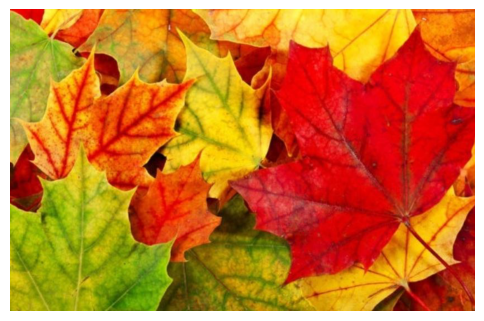

In [ ]:
print("Given Image is ===>")
plt.figure(dpi=100)
plt.axis('off')
plt.imshow(image)
plt.show()

In [ ]:
r,g,b=[],[],[]
for row in image:
    for temp_r, temp_g, temp_b in row:
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

In [ ]:
from scipy.cluster.vq import whiten #Whiten is used to Scale the data

scaled_red = whiten(r)
scaled_blue = whiten(b)
scaled_green = whiten(g)

In [ ]:
import pandas as pd
df = pd.DataFrame({'red':r,'blue':b,'green':g,'scaled_red':scaled_red,'scaled_blue':scaled_blue,
                   'scaled_green':scaled_green})
df.head()

,red,blue,green,scaled_red,scaled_blue,scaled_green
0,207,5,26,4.354082,0.243496,0.351793
1,207,4,25,4.354082,0.194797,0.338262
2,210,2,21,4.417185,0.097399,0.284140
3,214,1,19,4.501322,0.048699,0.257079
4,218,0,15,4.585458,0.000000,0.202957


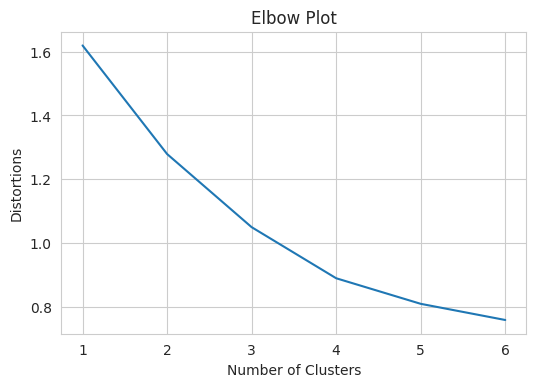

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.cluster.vq import kmeans,vq

distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(df[['scaled_red','scaled_blue','scaled_green']],i)
    distortions.append(distortion)

# Create a data frame with two lists, num_clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters':num_clusters,'distortions':distortions})

# Create a line plot of num_clusters and distortions
plt.figure(dpi=100)
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel("Distortions")
plt.show()

In [ ]:
cluster_centers, distortion = kmeans(df[['scaled_red','scaled_blue','scaled_green']],3)
print(cluster_centers)

[[4.37485838 0.52761996 0.47274228]
 [2.69531114 0.37850476 1.56554384]
 [4.77817127 1.75302833 2.29840646]]


In [ ]:
# Get standard deviations of each color
r_std, g_std, b_std = df[['red', 'green', 'blue']].std()

colors = []

for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    # Convert each standardized value to scaled value
    colors.append((
        scaled_r * r_std / 255,
        scaled_g * g_std / 255,
        scaled_b * b_std / 255
    ))

Original Image is ===> 


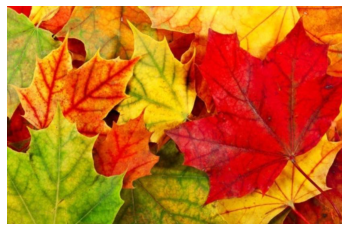

Extracting Colors from Image using KMeans Clustering ====>


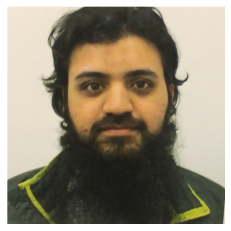

Dominant Colors of Image are===>


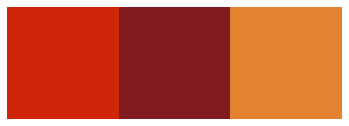

In [ ]:
print("Original Image is ===> ")
plt.axis('off')
plt.imshow(image)
plt.show()

print("Extracting Colors from Image using KMeans Clustering ====>")
plt.axis('off')
plt.imshow(arrow)
plt.show();

print("Dominant Colors of Image are===>")
plt.axis('off')
plt.imshow([colors])
plt.show()